# NYC Subway Data  - Vishnu Saatvik Ramisetty

In [1]:
from selenium import webdriver  #Selenium webdriver to control the webpage
from bs4 import BeautifulSoup   #BeautifulSoup for scraping data
import os
import pandas as pd
import time
import datetime
import re
import sqlite3 as lite
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 

## Data Collection and Transformation

Using the chromedriver, we set the webpage to be controlled by selenium. Print the first link and the last link being scraped.

In [3]:
url = 'http://web.mta.info/developers/turnstile.html'
chromedriver = "/users/sramisetty/Downloads/chromedriver_win32/chromedriver.exe"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get(url)
html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser')
# extract file link
pattern = re.compile('^data.')
data_list =  []
for link in soup.find_all('a', href=True):
    if re.match(pattern,link['href']):
        data_list.append('http://web.mta.info/developers/'+link['href'])
#check: data should range from 05/05/2010 to 02/18/2018
print(data_list[0])
print(data_list[-1][-10:-4])

http://web.mta.info/developers/data/nyct/turnstile/turnstile_180210.txt
100505


Upon observation, the data scheme is different prior to 10/18/2014. So we need to store the data in a different table for those links.


In [4]:
for i, v in enumerate(data_list):
    if v[-10:] == '141011.txt':
        print(i)

174


In [5]:
#data_list_prior = data_list[175:]
#data_list_post = data_list[:174]

data_list_prior = data_list[174:]
data_list_post = data_list[:174]

#### Create Two Different Tables to Store the Data. post.db and pre.db

In [6]:
conPost = lite.connect('post.db')  
conPre = lite.connect('pre.db')

**A.** Collect data ** AFTER** 10/18/14 

In [6]:
record_cnt = 0  
for link in data_list_post:
    data = pd.read_table(link, sep=',')
    print('%s:%s rows %s columns' % (link[-10:-4],data.shape[0], data.shape[1])) #printing out values makes me feel safe....
    record_cnt += data.shape[0]
    data.to_sql(name='post', con=conPost, flavor='sqlite', if_exists='append')

180210:197475 rows 11 columns


/anaconda/lib/python3.6/site-packages/pandas/io/sql.py:527: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


180203:199388 rows 11 columns
180127:201342 rows 11 columns
180120:199065 rows 11 columns
180113:201118 rows 11 columns
180106:200665 rows 11 columns
171230:197215 rows 11 columns
171223:199474 rows 11 columns
171216:198466 rows 11 columns
171209:198216 rows 11 columns
171202:197143 rows 11 columns
171125:197198 rows 11 columns
171118:198710 rows 11 columns
171111:199690 rows 11 columns
171104:198629 rows 11 columns
171028:197894 rows 11 columns
171021:197912 rows 11 columns
171014:197927 rows 11 columns
171007:196663 rows 11 columns
170930:197192 rows 11 columns
170923:198059 rows 11 columns
170916:198419 rows 11 columns
170909:197721 rows 11 columns
170902:199761 rows 11 columns
170826:195998 rows 11 columns
170819:200552 rows 11 columns
170812:195692 rows 11 columns
170805:201957 rows 11 columns
170729:200112 rows 11 columns
170722:197434 rows 11 columns
170715:196684 rows 11 columns
170708:195566 rows 11 columns
170701:197421 rows 11 columns
170624:197416 rows 11 columns
170617:197

In [7]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,01:00:00,REGULAR,805439,1141080
1,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,05:00:00,REGULAR,805459,1141141
2,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,09:00:00,REGULAR,805589,1141257
3,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,13:00:00,REGULAR,805834,1141512
4,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,17:00:00,REGULAR,806150,1141903


Check we don't miss anything

In [8]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""select count(*) from post""")
    cnt = cur.fetchall()
    print(cnt)
    print(record_cnt)

[(33623220,)]
33623220


**B.** Collec data ** BEFORE** 10/18/14 

In [ ]:
record_cnt = 0 
col_names = ["C/A","UNIT","SCP","DATE","TIME","DESC","ENTRIES","EXITS"]

for link in data_list_prior:
    for i in range(3,39,5):
        data = pd.read_table(link, sep=',',header = None,usecols = [0,1,2,i,i+1,i+2,i+3,i+4],names = col_names)
        print('%s:%s rows %s columns' % (link[-10:-4],data.shape[0], data.shape[1]))
        record_cnt += data.shape[0]
        data.to_sql(name='prior', con=conPre, flavor='sqlite', if_exists='append')

141011:29797 rows 8 columns


/anaconda/lib/python3.6/site-packages/pandas/io/sql.py:527: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


141011:29797 rows 8 columns
141011:29797 rows 8 columns
141011:29797 rows 8 columns
141011:29797 rows 8 columns
141011:29797 rows 8 columns
141011:29797 rows 8 columns
141011:29797 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
141004:30125 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140927:29972 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140920:29628 rows 8 columns
140913:29676 rows 8 columns
140913:29676 rows 8 columns
140913:29676 rows 8 columns
140913:29676 rows 8 columns
140913:29676 rows 8 

In [ ]:
data.head()

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from prior""")
    cnt = cur.fetchall()
    print(cnt)
    print(record_cnt)

#### Add TURNSTILE and modify data type

In [ ]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""UPDATE prior set ENTRIES = CAST(ENTRIES as real)""")## string to float
    cur.execute("""UPDATE prior set EXITS = CAST(EXITS as real)""")

In [13]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""create TABLE pre AS select *, [C/A] || '-' || UNIT || '-' || SCP AS TURNSTILE from prior""")

In [14]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""SELECT * FROM pre LIMIT 5""")
    cnt = cur.fetchall()
    print(cnt)

[(0, 'A002', 'R051', '02-00-00', '10-04-14', '00:00:00', 'REGULAR', 4810694, 1632419, 'A002-R051-02-00-00'), (1, 'A002', 'R051', '02-00-00', '10-05-14', '08:00:00', 'REGULAR', 4811532, 1632653, 'A002-R051-02-00-00'), (2, 'A002', 'R051', '02-00-00', '10-06-14', '16:00:00', 'REGULAR', 4812783, 1633296, 'A002-R051-02-00-00'), (3, 'A002', 'R051', '02-00-00', '10-08-14', '00:00:00', 'REGULAR', 4815662, 1633996, 'A002-R051-02-00-00'), (4, 'A002', 'R051', '02-00-00', '10-09-14', '08:00:00', 'REGULAR', 4817510, 1634680, 'A002-R051-02-00-00')]


**C.** Remote Unit/Control Area/Station Name Key

In [15]:
col_names = ["UNIT",'C/A','STATION','LINENAME','DIVISION']
remote = pd.read_excel("http://web.mta.info/developers/resources/nyct/turnstile/Remote-Booth-Station.xls", names=col_names).drop_duplicates(['UNIT','C/A'])
remote.to_sql(name='remote', con=conPre, flavor='sqlite', if_exists='replace')

with conPre:
    cur = conPre.cursor()
    cur.execute("""select count(*) from remote""")
    cnt = cur.fetchall()
    print(cnt)

[(768,)]


/anaconda/lib/python3.6/site-packages/pandas/io/sql.py:527: FutureWarning: the 'flavor' parameter is deprecated and will be removed in a future version, as 'sqlite' is the only supported option when SQLAlchemy is not installed.
  _validate_flavor_parameter(flavor)


In [16]:
remote.head()

,UNIT,C/A,STATION,LINENAME,DIVISION
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [17]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""SELECT * FROM remote LIMIT 5""")
    cnt = cur.fetchall()
    print(cnt)

[(0, 'R001', 'A060', 'WHITEHALL ST', 'R1', 'BMT'), (1, 'R001', 'A058', 'WHITEHALL ST', 'R1', 'BMT'), (2, 'R001', 'R101S', 'SOUTH FERRY', 'R1', 'IRT'), (3, 'R002', 'A077', 'FULTON ST', 'ACJZ2345', 'BMT'), (4, 'R002', 'A081', 'FULTON ST', 'ACJZ2345', 'BMT')]


Now we have two databases: post.db and pre.db

1. **post.db** has **one** table called **post**, which stores complete information about data after 10/18/14;

2. **pre.db** has **two** tables called **remote and pre**;

** schemas of tables:**

In [18]:
with conPre:
    cur = conPre.cursor()
    #cur.execute("""select sql from sqlite_master where type = 'table' and name = 'prior'""")
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'pre'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE pre(\n  "index" INT,\n  "C/A" TEXT,\n  UNIT TEXT,\n  SCP TEXT,\n  DATE TEXT,\n  TIME TEXT,\n  "DESC" TEXT,\n  ENTRIES INT,\n  EXITS INT,\n  TURNSTILE\n)',)]


In [19]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""create TABLE pos AS select *, [C/A] || '-' || UNIT || '-' || SCP AS TURNSTILE from post""")

In [20]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'pos'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE pos(\n  "index" INT,\n  "C/A" TEXT,\n  UNIT TEXT,\n  SCP TEXT,\n  STATION TEXT,\n  LINENAME TEXT,\n  DIVISION TEXT,\n  DATE TEXT,\n  TIME TEXT,\n  "DESC" TEXT,\n  ENTRIES INT,\n  "EXITS                                                               " INT,\n  TURNSTILE\n)',)]


In [21]:
with conPost:
    cur = conPost.cursor()
    cur.execute("""SELECT * FROM pos LIMIT 5""")
    desc = cur.fetchall()
    print(desc)

[(0, 'A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '10/25/2014', '00:00:00', 'REGULAR', 4841726, 1642694, 'A002-R051-02-00-00'), (1, 'A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '10/25/2014', '04:00:00', 'REGULAR', 4841761, 1642697, 'A002-R051-02-00-00'), (2, 'A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '10/25/2014', '08:00:00', 'REGULAR', 4841779, 1642714, 'A002-R051-02-00-00'), (3, 'A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '10/25/2014', '12:00:00', 'REGULAR', 4841925, 1642826, 'A002-R051-02-00-00'), (4, 'A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '10/25/2014', '16:00:00', 'REGULAR', 4842220, 1642910, 'A002-R051-02-00-00')]


** Sanity Check:** Missing Data

In [22]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select count([C/A]), COUNT(SCP),count(unit) from pre""")
    cnt = cur.fetchall()
    print(cnt)

[(956176, 956176, 956176)]


In [23]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""SELECT * FROM pre LIMIT 5""")
    cnt = cur.fetchall()
    print(cnt)

[(0, 'A002', 'R051', '02-00-00', '10-04-14', '00:00:00', 'REGULAR', 4810694, 1632419, 'A002-R051-02-00-00'), (1, 'A002', 'R051', '02-00-00', '10-05-14', '08:00:00', 'REGULAR', 4811532, 1632653, 'A002-R051-02-00-00'), (2, 'A002', 'R051', '02-00-00', '10-06-14', '16:00:00', 'REGULAR', 4812783, 1633296, 'A002-R051-02-00-00'), (3, 'A002', 'R051', '02-00-00', '10-08-14', '00:00:00', 'REGULAR', 4815662, 1633996, 'A002-R051-02-00-00'), (4, 'A002', 'R051', '02-00-00', '10-09-14', '08:00:00', 'REGULAR', 4817510, 1634680, 'A002-R051-02-00-00')]


# Data Analysis

#### 1. Which station has the most number of units?
    
   **Answer：** 86 ST  

In [24]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION, COUNT(DISTINCT unit) from remote group by STATION order by count(distinct unit) desc limit 1""")
    top_station = cur.fetchall()
print(top_station)
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)

[('86 ST', 5)]
Spend 0 seconds


#### 2. What is the total number of entries & exits across the subway system for August 1, 2013?

   **Answer：** 
   
   Due to the complexity of data recording, there are different ways to define daily total number of entries & exits. 
   
   Here I tried two methods:
   
   **A**: for each turnstile, daily registration is calculated by max(today) - max(previous); 
   
   **B**: for each turnstile, daily registration is calculated by Last record(today) - first record(today). 
   
   Those two methods gave me two results: **9958949** for A and **9636595** for B.
   
   Comparing the two, I chose the first method for its calculation simplicity.

###### Solution A:

In [32]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    #cur.execute("""select TURNSTILE,DATE,max(ENTRIES) AS entries, max(EXITS) as exits from pre
    cur.execute("""select * from pre
    group by TURNSTILE, date Having DATE IN ('08-01-13','07-31-13') AND DESC = 'REGULAR'""")
    EE080113 = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)
print(EE080113)

Spend 3 seconds
[]


In [30]:
EE080113_df = pd.DataFrame(EE080113,columns = ['turnstile','date','entries','exits'])
sum(list(filter(lambda x:x>0,EE080113_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna().values)))

0

##### Solution B:

In [31]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,DESC,TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '08-01-13' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select TURNSTILE,DESC,'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from prior where DATE = '08-02-13' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE080113 = cur.fetchall()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 96))



OperationalError: no such column: TURNSTILE

In [475]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,DESC,TIME,(ENTRIES+EXITS) AS TOTAL \
    from pre where DATE = '08-01-13' AND DESC IN ('REGULAR','RECOVR AUD')
    UNION ALL
    select TURNSTILE,DESC,'24:00:00' AS TIME,(ENTRIES+EXITS) AS TOTAL \
    from pre where DATE = '08-02-13' AND TIME = '00:00:00'AND DESC IN ('REGULAR','RECOVR AUD')""")
    EE080113 = cur.fetchall()
end = datetime.datetime.now()
EE080113_df = pd.DataFrame(EE080113,columns = ['turnstile','DESC','time','total'])
print(len(EE080113_df))
EE080113_df = EE080113_df.dropna().sort_values(by = 'DESC').reindex()
print(len(EE080113_df))
## recover audit
EE080113_df = EE080113_df[~EE080113_df.duplicated(['turnstile','time'],keep = 'first').values].groupby(['turnstile','time']).sum().sort_index()
print(len(EE080113_df))
first = EE080113_df.groupby(level=0).nth(0)
last = EE080113_df.groupby(level=0).nth(-1)
diff = pd.concat([first, last], axis=1, join='inner').diff(axis = 1)
print(diff.sum())
print('Spend %s seconds'%(end-start).seconds)

31947
31947
30666
total          0.0
total   -1236270.0
dtype: float64
Spend 74 seconds


Why the value is negative? 

In [482]:
diff[diff.iloc[:,-1]<0]

,total,total
turnstile,,
N504-R021-02-00-04,NaN,-10869325.0


It shows Turnstile N504-R021-02-00-04 has strange records. Then let's see full records of Turnstile N504-R021-02-00-04 

In [416]:
EE080113_df.iloc[EE080113_df.index.get_level_values('turnstile') == 'N504R02102-00-04']

total
turnstile        time                
N504R02102-00-04 00:00:00  10874252.0
                 04:00:00  10874298.0
                 08:00:00  10874687.0
                 12:00:00      1822.0
                 16:00:00      2774.0
                 20:00:00      4517.0
                 24:00:00      4927.0

In [483]:
print('Total number of entries & exits for Turnstile N504-R021-02-00-04 should be %s' % ((10874687 - 10874252)+(4927-1822)))

Total number of entries & exits for Turnstile N504-R021-02-00-04 should be 3540


In [491]:
print('The final answer is %s' %(sum(diff[diff.iloc[:,-1]>0].iloc[:,-1].values)+3540))

The final answer is 9636595.0


#### 3. Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date?

   **Answer：** 
   1. '42 ST-GRD CNTRL'
   2. C/A: N063A;  UNIT: R011;   SCP: 00-00-00

In [32]:
turnstile_r_df = pd.DataFrame(EE080113_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values
turnstile_r_df.sort_values(by = 0,ascending = False).iloc[0,:]

0    11786.0
Name: (N063A-R011-00-00-00, 08-01-13), dtype: float64

In [45]:
turnstile_r_df = turnstile_r_df.reset_index()
turnstile_r_df['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df['turnstile']))
turnstile_r_df[['station',0]].groupby('station').sum().sort_values(by = 0,ascending = False).iloc[0,:]

0    131388.0
Name: R238-R046, dtype: float64

In [46]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION from remote where UNIT = 'R046' AND [C/A] = 'R238'""")
    busy_station = cur.fetchall()
print(busy_station)

[('42 ST-GRD CNTRL',)]


#### 4. What stations have seen the most usage growth/decline in 2013

   **Answer:** 
   1. decease:'215 ST'
   2. incease:'FULTON ST'

In [8]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by turnstile, date Having DATE LIKE '%13' AND DESC = 'REGULAR'""")
    EE13 = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)
EE13_df = pd.DataFrame(EE13,columns = ['turnstile','date','entries','exits'])
turnstile_r_df_13 = pd.DataFrame(EE13_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

Spend 124 seconds


In [17]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by turnstile, date Having DATE LIKE '%12' AND DESC = 'REGULAR'""")
    EE12 = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)
EE12_df = pd.DataFrame(EE12,columns = ['turnstile','date','entries','exits'])
turnstile_r_df_12 = pd.DataFrame(EE12_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

Spend 127 seconds


In [18]:
turnstile_r_df13 = turnstile_r_df_13.reset_index()
turnstile_r_df13['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df13['turnstile']))
turnstile_r_df13 = turnstile_r_df13[turnstile_r_df13[0]>0]

turnstile_r_df12 = turnstile_r_df_12.reset_index()
turnstile_r_df12['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df12['turnstile']))
turnstile_r_df12 = turnstile_r_df12[turnstile_r_df12[0]>0]

In [19]:
ee13 = turnstile_r_df13[['station',0]].groupby('station').sum()
ee13.columns = ['re13']
ee12 = turnstile_r_df12[['station',0]].groupby('station').sum()
ee12.columns = ['re12']
change_df = ee12.join(ee13,lsuffix = '%')

In [21]:
pd.DataFrame((change_df['re13']-change_df['re12'])/change_df['re12']).sort_values(by  = 0).iloc[0,:]

0   -0.999157
Name: R190-R038, dtype: float64

In [25]:
pd.DataFrame((change_df['re13']-change_df['re12'])/change_df['re12']).sort_values(by  = 0).dropna().iloc[-1,:]

0    3309.666667
Name: R114-R028, dtype: float64

In [26]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select STATION from remote where UNIT = 'R038' AND [C/A] = 'R190'""")
    d_station = cur.fetchall()
    print('decease:%s'%d_station)
    print("---------")
    cur.execute("""select STATION from remote where UNIT = 'R028' AND [C/A] = 'R114'""")
    i_station = cur.fetchall()
    print('incease:%s'%i_station)

decease:[('215 ST',)]
---------
incease:[('FULTON ST',)]


#### 5. What dates are the least busy? Could you identify days on which stations were not operating at full capacity or closed entirely?

   **Answer:** 
   1. Least busy: 2012-10-30
   2. For example: 2010-04-18  A002-R051

In [27]:
start = datetime.datetime.now()
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre
    group by turnstile, date Having DESC = 'REGULAR'""")
    EE = cur.fetchall()
end = datetime.datetime.now()
print('Spend %s seconds'%(end-start).seconds)

Spend 143 seconds


In [28]:
EE_df = pd.DataFrame(EE,columns = ['turnstile','date','entries','exits'])
EE_df['date'] = pd.to_datetime(EE_df['date'], format='%m-%d-%y')
turnstile_r_df = pd.DataFrame(EE_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

turnstile_r_df = turnstile_r_df.reset_index()
turnstile_r_df['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_df['turnstile']))
turnstile_r_df = turnstile_r_df[turnstile_r_df[0]>=0]

In [29]:
turnstile_r_df[['date',0]].groupby('date').sum().sort_values(by = 0).head()

,0
date,
2012-10-30,13310.0
2012-10-31,22186.0
2012-10-29,28259.0
2011-08-28,69844.0
2012-11-01,396289.0


In [30]:
turnstile_r_df[turnstile_r_df[0] == 0].groupby(['date','station']).count()['turnstile']

date        station   
2010-04-18  A002-R051     2
            A007-R079     1
            A043-R462     3
            A046-R463     3
            A047-R087     5
            A050-R088     8
            A055-R227     2
            A058-R001     1
            A060-R001     1
            A077-R002     1
            A082-R002     4
            A083-R125     1
            A084-R125     7
            A085-R125     4
            B009-R411     1
            B013-R196     1
            C004-R089     3
            C008-R099     2
            C009-R057     2
            C022-R212     2
            C026-R215     2
            C028-R216     2
            D004-R391     2
            D006-R398     2
            D011-R394     2
            G001-R151     1
            G009-R151     1
            G015-R312     2
            H001-R175     2
            H041-R152     1
                         ..
2014-10-10  R317-R408     2
            R318-R408     1
            R323-R387     2
            R325-R388    

# Visualization

#### 1. Plot the daily row counts for data files in Q3 2013.

In [32]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select DATE, count(*) from pre group by date Having DATE LIKE '%13'""")
    temp = cur.fetchall()
daily_rcnt = pd.DataFrame(temp,columns = ['DATE','CNT'])
daily_rcnt['Month'] = list(map(lambda x:x.split('-')[0],daily_rcnt['DATE']))
daily_rcnt['DATE'] = pd.to_datetime(daily_rcnt['DATE'], format='%m-%d-%y')
daily_rcnt = daily_rcnt[((daily_rcnt['Month']=='07') & (daily_rcnt['Month']=='08') & (daily_rcnt['Month']=='09'))]

In [33]:
daily_rcnt = pd.DataFrame(temp,columns = ['DATE','CNT'])
daily_rcnt['Month'] = list(map(lambda x:x.split('-')[0],daily_rcnt['DATE']))
daily_rcnt['DATE'] = pd.to_datetime(daily_rcnt['DATE'], format='%m-%d-%y')

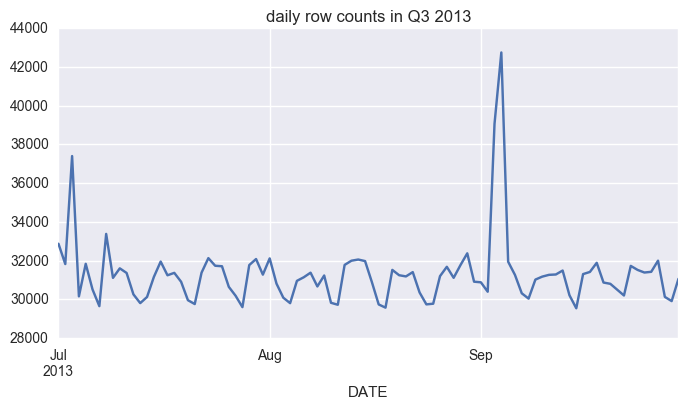

In [34]:
plt.figure(figsize=(8,4))
daily_rcnt[((daily_rcnt['Month']>='07') & (daily_rcnt['Month']<='09'))].set_index('DATE')['CNT'].plot()
plt.title('daily row counts in Q3 2013')

#### 2. Plot the daily total number of entries & exits across the system for Q3 2013.

In [35]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select TURNSTILE,date,max(ENTRIES) AS entries, max(exits) as exits from pre 
    group by turnstile, date Having date LIKE '%13' AND substr(date,2,1) IN ('7','8','9') AND desc = 'REGULAR' """)
    turnstile_daily_Q3 = cur.fetchall()

In [36]:
turnstile_daily_Q3_df = pd.DataFrame(turnstile_daily_Q3,columns = ['turnstile','date','entries','exits'])
turnstile_daily_Q3_df['date'] = pd.to_datetime(turnstile_daily_Q3_df['date'], format='%m-%d-%y')
turnstile_r_dfQ3 = pd.DataFrame(turnstile_daily_Q3_df.groupby(['turnstile','date']).sum().sum(axis = 1).groupby(level = 0).diff().dropna())#.values

turnstile_r_dfQ3 = turnstile_r_dfQ3.reset_index()
turnstile_r_dfQ3['station'] = list(map(lambda x:x.split('-')[0]+'-'+x.split('-')[1],turnstile_r_dfQ3['turnstile']))
turnstile_r_dfQ3  = turnstile_r_dfQ3[turnstile_r_dfQ3[0]>=0]

In [37]:
turnstile_r_dfQ3[['date',0]].groupby('date').sum().sort_values(by = 0).head()

,0
date,
2013-07-07,4975660.0
2013-09-01,5065400.0
2013-07-21,5142865.0
2013-08-18,5199397.0
2013-09-08,5255054.0


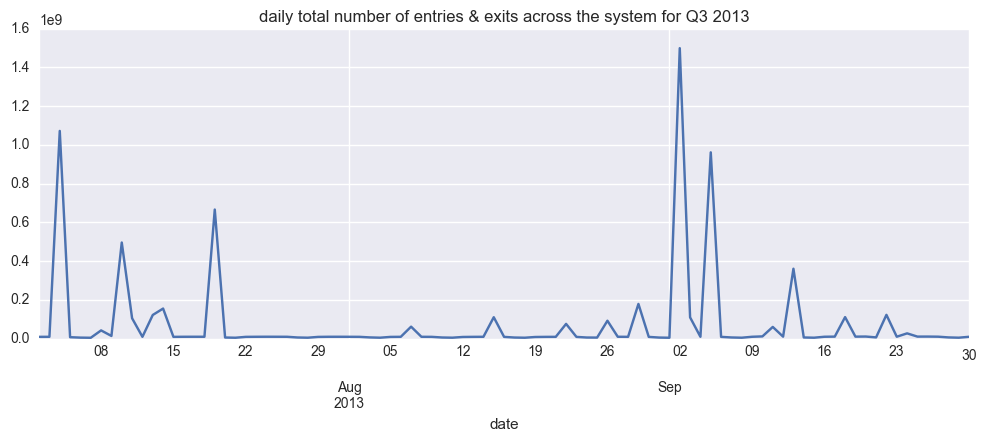

In [38]:
turnstile_r_dfQ3[['date',0]].groupby('date').sum().sort_index().plot(figsize = (12,4))
plt.title('daily total number of entries & exits across the system for Q3 2013')
plt.legend([])

*** There are some anomalies in the chart above. Need to check the data later***

#### 3.   Plot the mean and standard deviation of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA

In [39]:
with conPre:
    cur = conPre.cursor()
    cur.execute("""select [C/A],UNIT from remote where station = '34 ST-PENN STA'""")
    station = cur.fetchall()
print(station)

[('N067', 'R012'), ('N065', 'R012'), ('N068', 'R012'), ('N070', 'R012'), ('N072', 'R012'), ('N071', 'R013'), ('N069', 'R013'), ('N073', 'R013'), ('R141', 'R031'), ('R135', 'R031'), ('R137', 'R031'), ('R139', 'R031'), ('R138', 'R293'), ('R142', 'R293')]


In [40]:
list_S = list(map(lambda x: x[0]+'-'+x[1],station))

In [41]:
Q3pEN_df = turnstile_r_dfQ3[turnstile_r_dfQ3['station'].isin(list_S)]
Q3pEN_df["month"] = list(map(lambda x:x.month,Q3pEN_df['date']))

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


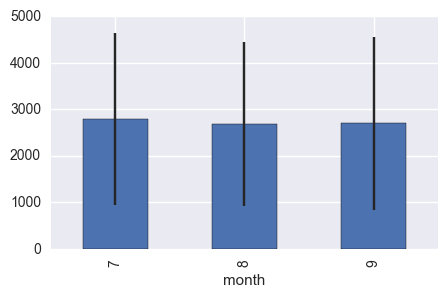

In [42]:
gp = Q3pEN_df[['month',0]].groupby('month')
mean = gp.mean()
std = gp.std()
ax = mean.plot(yerr=std,kind='bar',figsize = (5,3))
plt.legend([])

#### 4.   Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


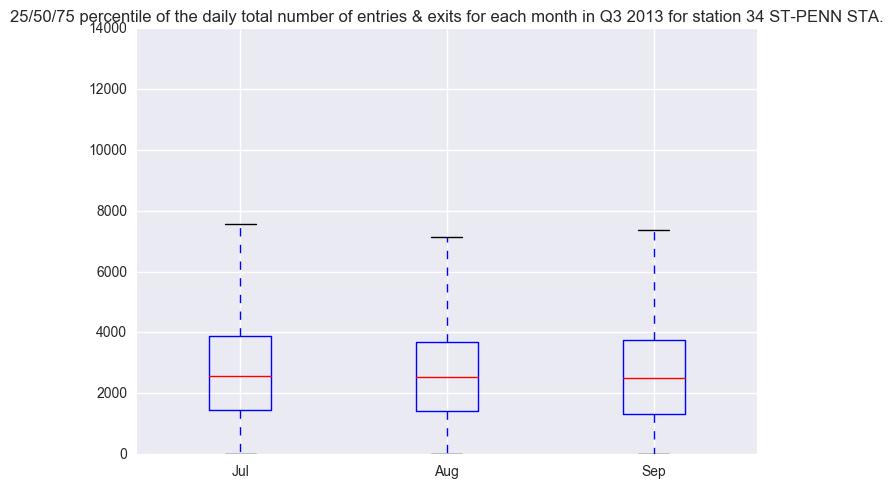

In [43]:
Q3pEN_df['month']=Q3pEN_df['month'].apply(str)
df2 = Q3pEN_df[['month',0]].stack().reset_index(level=0, drop=True).reset_index()
df2.columns = ['column name', 'value']
df2.sort_values(['column name', 'value'], inplace=True)
fig, ax = plt.subplots()
plt.boxplot([Q3pEN_df[Q3pEN_df['month']=='7'][0].values,Q3pEN_df[Q3pEN_df['month']=='8'][0].values,Q3pEN_df[Q3pEN_df['month']=='9'][0].values])
labels = ['Jul','Aug','Sep']
ax.set_xticklabels(labels)
plt.title('25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA.')
plt.figure(figsize=(8,3))

#### 5. Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013

In [47]:
turnstile_r_dfQ3['close']= turnstile_r_dfQ3[0]==0

In [55]:
full = turnstile_r_dfQ3[['date','station','close']].groupby(['date','station']).sum()
full.columns = ['sum']#.groupby('date').count

In [54]:
close = turnstile_r_dfQ3[['date','station','close']].groupby(['date','station']).count()#.groupby('date').count
close.columns = ['cnt']

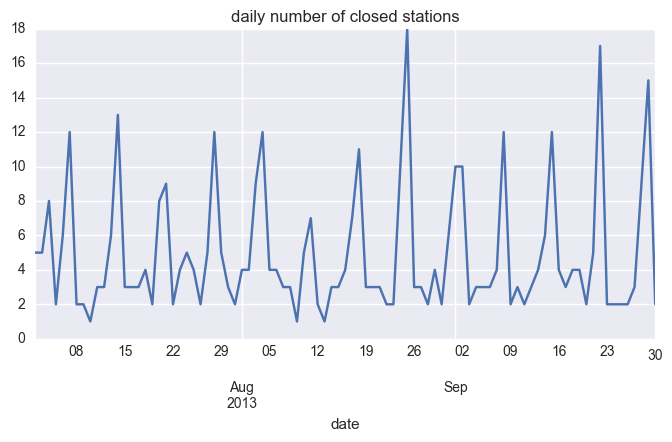

In [69]:
operation = full.join(close)
operation[operation['sum']==operation['cnt']].reset_index()[['date','station']].groupby(['date']).count().plot(figsize = (8,4))
plt.title('daily number of closed stations')
plt.legend([])

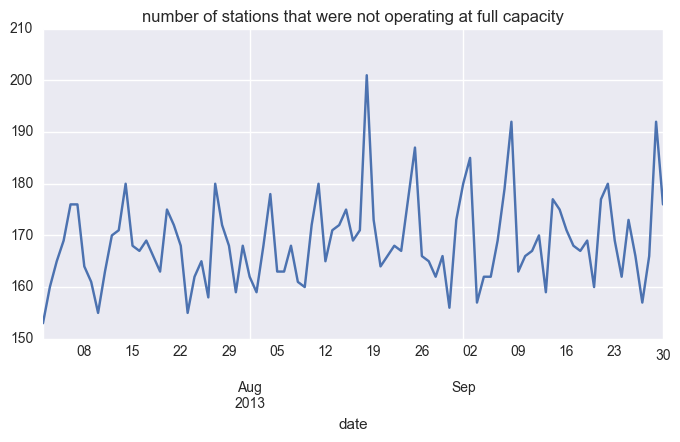

In [71]:
temp = operation[operation['cnt']!=operation['sum']]
temp[temp['sum']!=0].reset_index()[['date','station']].groupby(['date']).count().plot(figsize = (8,4))
plt.title('number of stations that were not operating at full capacity')
plt.legend([])